<a href="https://colab.research.google.com/github/anh-honcharuk/Neural-Networks/blob/main/sem_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Імпортуйте необхідні бібліотеки.

In [ ]:
import pandas as pd

2. Завантажимо надані у файли з вихідними даними. Ознайомтеся з ними.

In [ ]:
df = pd.read_csv('howpop_test.csv')
df2 = pd.read_csv('howpop_train.csv')

3. Виведіть дані так як показано на зображенні.

In [ ]:
df.head().transpose()

,0,1,2,3,4
url,https://habrahabr.ru/post/314080/,https://habrahabr.ru/company/plesk/blog/313732/,https://habrahabr.ru/company/etagi/blog/314000/,https://habrahabr.ru/company/knopka/blog/314030/,https://geektimes.ru/company/audiomania/blog/2...
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,314080,313732,314000,314030,282058
published,2016-11-01 01:05:00,2016-11-01 05:42:00,2016-11-01 08:33:00,2016-11-01 09:00:00,2016-11-01 09:44:00
author,@fsou11,NaN,NaN,NaN,NaN
flow,develop,marketing,admin,develop,NaN
polling,True,False,False,False,False
content_len,20132,12389,72839,29572,9642
title,Опыт использования MassTransit 3.0,Геймификация форума на движке XenForo,Кластер высокой доступности на postgresql 9.6 ...,Как перестать бояться и полюбить синтаксически...,Мифы и реальность: Что нужно знать о современн...


In [ ]:
df2.head().transpose()

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


4. Видаліть данні, що завершуються на _lognorm

In [ ]:
# df2.filter(regex=r'^((?!_lognorm).)*$').transpose()
prefix_cols = [col for col in df2.columns if not col.endswith('_lognorm')]
data = df2[prefix_cols]
data.head().transpose()

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


5. Застосуйте для виводу статистичної інформації функцію
DataFrame.describe()

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


6. Стовпець published (час публікації) містить рядки. Щоб ми могли працювати
з цими даними як з датою/ часом публікації, перетворіть їх до типу datetime:

In [ ]:
data['published'] = pd.to_datetime(data['published'], format='%Y/%m/%d %H:%M:%S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


7. Створіть кілька стовпців на основі даних про час публікації:

In [ ]:
data['year'] = [d.year for d in data.published] 
data['month'] = [d.month for d in data.published] 
data['dayofweek'] = [d.isoweekday() for d in data.published] 
data['hour'] = [d.hour for d in data.published]

data.head().transpose()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


**Завдання:**

1. В якому місяці (і якого року) було найбільше публікацій?

---


 березень 2016

---


 березень 2015

---


 квітень 2015

---


 квітень 2016

березень 2015


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


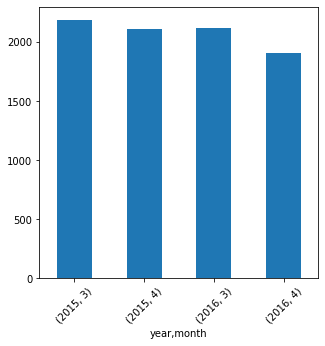

In [ ]:
find = data[(data['year'] == 2015) | (data['year'] == 2016)][(data['month'] == 3) | (data['month'] == 4)]
find.groupby(['year', 'month']).size().plot(kind='bar', rot=45, figsize=(5,5))
print("березень 2015")

2. Проаналізуйте публікації в місяці з попереднього питання. Виберіть один або кілька варіантів:

---


1) Один або кілька днів сильно виділяються із загальної картини

---


2) На Хабре завжди більше статей, ніж на гіктаймсе

---


3) По суботах на гіктаймс і на Хабрахабр публікують приблизно однакове
число статей

1) Субота та неділя сильно виділяються із загальної картини


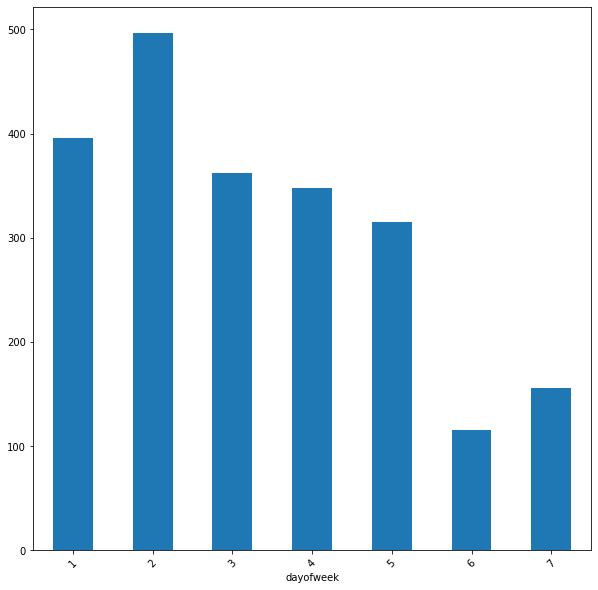

In [ ]:
find2 = data[(data['year'] == 2015) & (data['month'] == 3)]
find2.groupby(['dayofweek']).size().plot(kind='bar', rot=45, figsize=(10,10))
print('1) Субота та неділя сильно виділяються із загальної картини')

2) Так
3) Так


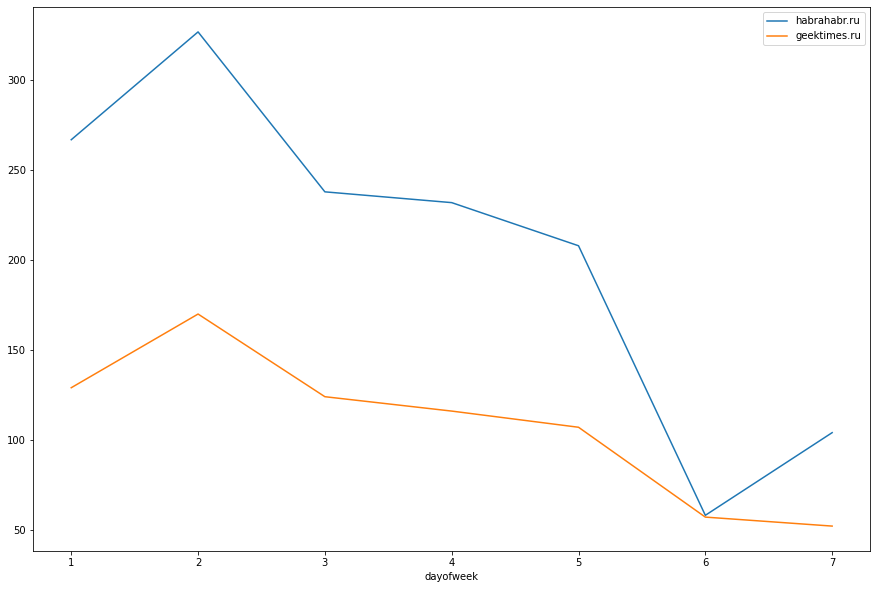

In [ ]:
habr = find2[find2['domain'] == 'habrahabr.ru'].groupby('dayofweek').size().rename('habrahabr.ru')
geek = find2[find2['domain'] == 'geektimes.ru'].groupby('dayofweek').size().rename('geektimes.ru')
pd.concat([habr, geek], axis=1).plot(figsize=(15,10))
print('2) Так')
print('3) Так')

3. Коли найкраще опублікувати статтю?

---


1) Найбільше переглядів набирають статті, опубліковані о 12 годині дня

---


2) У опублікованих в 10 ранку постів найбільше коментарів

---


3) Найбільше переглядів набирають статті, опубліковані в 6 годині ранку

---


4) Максимальна кількість коментарів на гіктаймсе набрала стаття,
опублікована о 9 годині вечора

---


5) На Хабре денні статті коментують частіше, ніж вечірні.

1) Так
3) Так


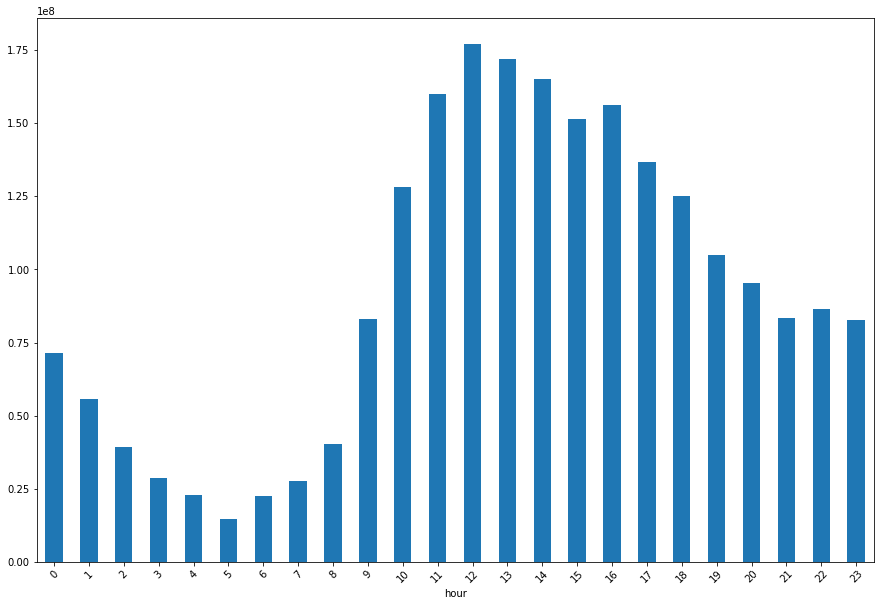

In [ ]:
data.groupby('hour')['views'].sum().plot(kind='bar', rot=45, figsize=(15,10))
print('1) Так')
print('3) Так')

2) Ні


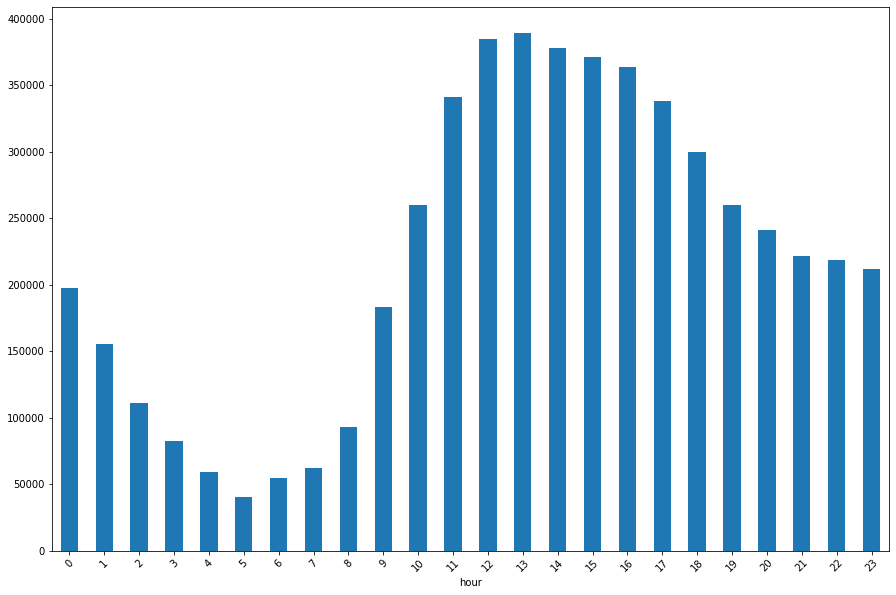

In [ ]:
data.groupby('hour')['comments'].sum().plot(kind='bar', rot=45, figsize=(15,10))
print('2) Ні')

4) Ні


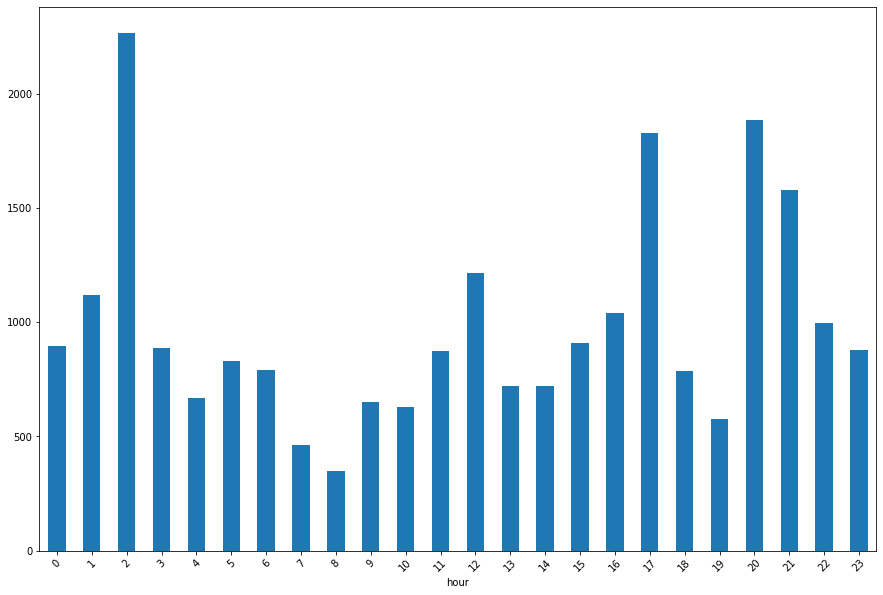

In [ ]:
data[data['domain'] == 'geektimes.ru'].groupby('hour')['comments'].max().plot(kind='bar', rot=45, figsize=(15,10))
#4) Максимальна кількість коментарів на гіктаймсе набрала стаття, опублікована о 9 годині вечора
print('4) Ні')

5) Так


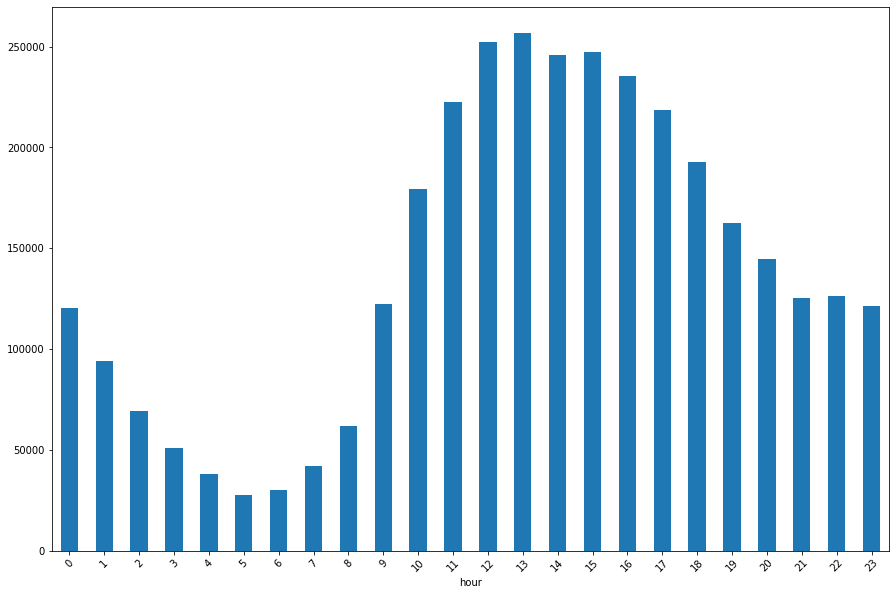

In [ ]:
data[data['domain'] == 'habrahabr.ru'].groupby('hour')['comments'].sum().plot(kind='bar', rot=45, figsize=(15,10))
print('5) Так')

4. Кого з топ-20 авторів найчастіше мінусують?

---


@Mordatyj

---


@Mithgol

---


@alizar

---


@ilya42

4. @alizar


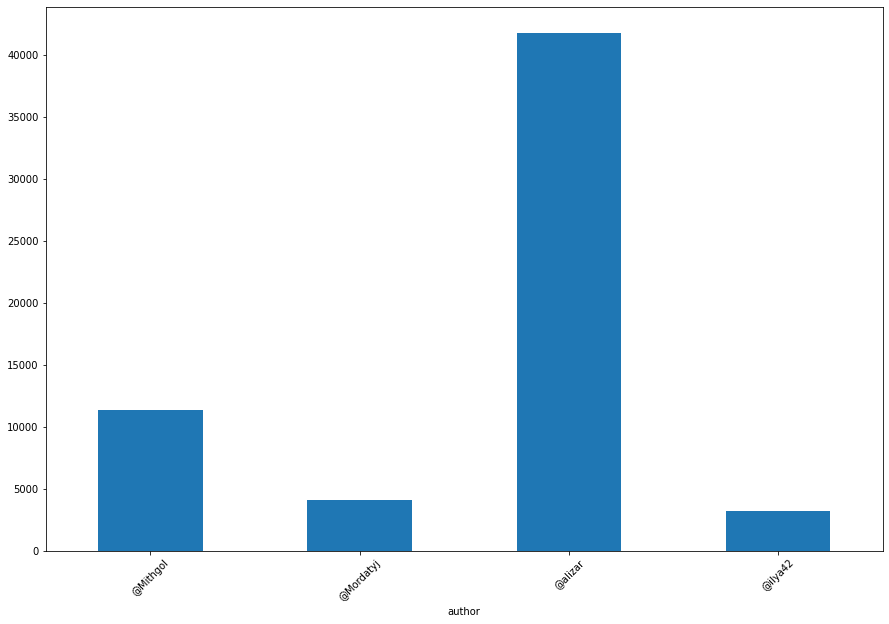

In [ ]:
auth = ['@Mordatyj', '@Mithgol', '@alizar', '@ilya42']
win = data[data['author'].isin(auth)]
win.groupby('author')['votes_minus'].sum().plot(kind='bar', rot=45, figsize=(15,10))
print('4. @alizar')

5. Порівняйте суботи і понеділки

---


Чи правда, що по суботах автори пишуть в основному вдень, а по понеділках - в
основному ввечері?

5. Ні


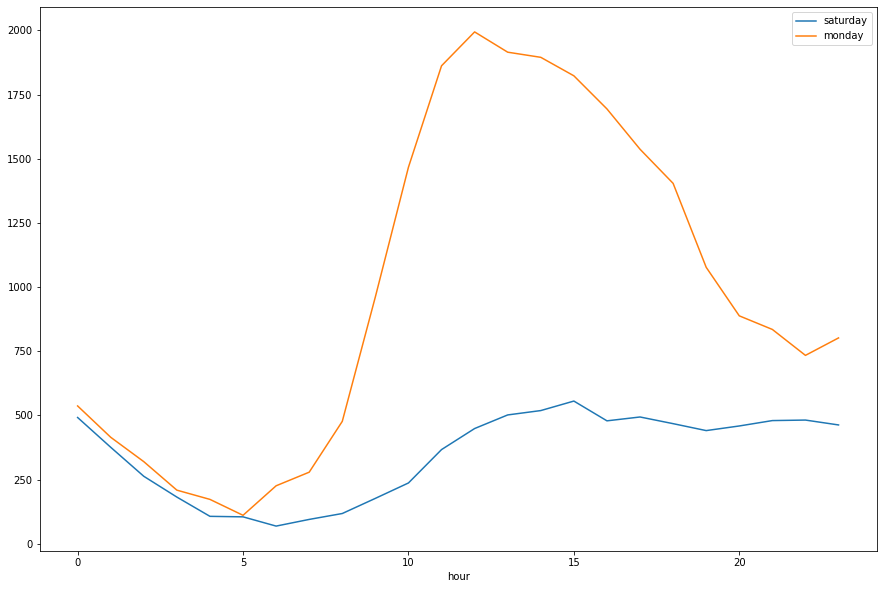

In [ ]:
saturday = data[data['dayofweek'] == 6].groupby('hour').size().rename('saturday')
monday = data[data['dayofweek'] == 1].groupby('hour').size().rename('monday')

pd.concat([saturday, monday], axis=1).plot(figsize=(15,10))
print('5. Ні')